# 商品库存学习目标
- 知道库存管理ABC模型
- 知道库存管理XYZ模型
- 完成ABC-XYZ建模案例


---

# 1、什么是ABC模型？
概念：ABC是库存管理的经典模型，是通过计算每个SKU的销售收入在所有的SKU产生的总收入中的累计百分比贡献进行排名，对商品进行分类，基于帕累托原则（2/8法则）

# 2、什么是XYZ模型？
概念：在很长一段时间内测量每个SKU的销售需求，以捕捉需求的季节性变化，然后计算每个SKU的方差，并根据其变化进行排名

# 3、ABC模型和XYZ模型可以组合吗？怎么组合
- ABC法和XYZ法是从不同的角度来处理库存管理的问题，而且对运营和采购人员都很有用，所以可以将它们结合起来
- 组合方法：对于每个SKU我们组成AX、AY、AZ、BX、BY、BZ、CX、CY、CZ九个类别，通过这九个类别可以帮助运营和采购人员了解两者对收入的重要性以及需求的变化


# 业务解读

## ABC XYZ分类的业务解读

- 通过组合 ABC 和 XYZ 数据，我们生成了九个不同的类。 带有 A 前缀的类都贡献高收入，B 类贡献中等收入，C 类贡献低收入。
- X 后缀的类别需求稳定，易于预测和管理。 Y 后缀的类具有可变但可预测的需求，因此比 X 类更难管理，但仍然容易实现。 Z 类是最难的。 它们零星地以不同的数量出售，因此更难预测和管理。

- AX：高价值      需求稳定      易于预测   易于管理
  BX：中等价值   需求稳定     易于预测   易于管理
  CX：低价值       需求稳定      易于预测    易于管理
- AY：高价值      可变需求    更难预测   更难管理
  BY：中等价值   可变需求  更难预测   更难管理
  CY：低价值      可变需求   更难预测   更难管理
- AZ：高价值       零星需求  难以预测  难以管理
  BZ：中等价值   零星需求  难以预测   难以管理
  CZ：低价值      零星需求   难以预测   难以管理

## 库存管理手段应用

- 避免缺货的最简单解决方是多备货，这有很多优点：
  - 损失更少的销售额，所以 AOV 和收入会更高；
  - 更好的客户保留率和更高的满意度，因为客户在看到商品缺货时可能去竞品购买
  - 不需要紧急补货，通常紧急补货需要溢价
- 保持库存高冗余也有一些缺点：
  - 库存上花费更多；更多的资金被库存占用；
  - 需要更多空间、设备和人员来处理库存；
  - 保险费用会随着您的库存估值而上涨。
  - 我们需要找到合适的平衡点

国际注册专业会计师协会在 ABC XYZ 分类的实际应用方面提供了一些非常好的建议，可以采用以下方法：

- AX：自动补货      需求稳定      易于预测   易于管理
  BX：自动补货  需求稳定     易于预测   易于管理
  CX：自动补货       需求稳定      易于预测    易于管理
- AY：半自动补货      低缓冲    更难预测   更难管理
  BY：半自动补货  可变需求  更难预测   更难管理
  CY：半自动补货      可变需求   更难预测   更难管理
- AZ：按订单购买       无缓冲  无库存  
  BZ：下单订货   无缓存  无库存   难以管理
  CZ：自动补货      高缓冲   难以预测   难以管理

# 总结
- ABC库存管理模型：从收入角度SKU分成高贡献，中贡献和低贡献三类
- XYZ库存管理模型：从销售变化角度讲SKU分成需求波动小，需求波动中等，需求波动大三类
- ABC-XYZ模型将所有SKU划分成9类
- 需求波动我们可以通过变异系数进行计算
- ABCXYZ类别阈值划应结合不同业务情况划定



In [1]:
# 导入Pandas包（Pandas是基于numpy）
import pandas as pd

# 加载在线零售数据
data1 = pd.read_excel('./file/online_retail_II.xlsx', sheet_name = 'Year 2009-2010')
data2 = pd.read_excel('./file/online_retail_II.xlsx', sheet_name = 'Year 2010-2011')

AttributeError: 'DataFrame' object has no attribute 'concat'

In [2]:
data = pd.concat([data1, data2], ignore_index = True)
'''
    数据条目：525461条
    字段数据量和类型：7个字段，时间类型、浮点型、64位整型、对象类型
    存在空的字段：Description、Customer ID
    占用内存：32.1+ MB
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [3]:
# 将日期类型转化为日期时间类型，并提取12个月数据
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

transform_date_condition = (data['InvoiceDate'] > '2010-01-01') & (data['InvoiceDate'] <= '2010-12-31')
df_12m = data[transform_date_condition]
df_12m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522714 entries, 45228 to 567941
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      522714 non-null  object        
 1   StockCode    522714 non-null  object        
 2   Description  519889 non-null  object        
 3   Quantity     522714 non-null  int64         
 4   InvoiceDate  522714 non-null  datetime64[ns]
 5   Price        522714 non-null  float64       
 6   Customer ID  412624 non-null  float64       
 7   Country      522714 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.9+ MB


In [5]:
df_12m.columns= ['OrderNo', 'sku', 'Description', 'quantity', 'date_created', 'UnitPrice', 'CustomerID', 'Country']
df_12m = df_12m.assign(month = df_12m['date_created'].dt.month)
df_12m.head()

,OrderNo,sku,Description,quantity,date_created,UnitPrice,CustomerID,Country,month
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom,1
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0,United Kingdom,1
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom,1
45231,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,United Kingdom,1
45232,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN,United Kingdom,1


In [6]:
df_12m = df_12m.query('quantity > 0 & UnitPrice > 0')
#查看数据情况
df_12m.shape[0]

509089

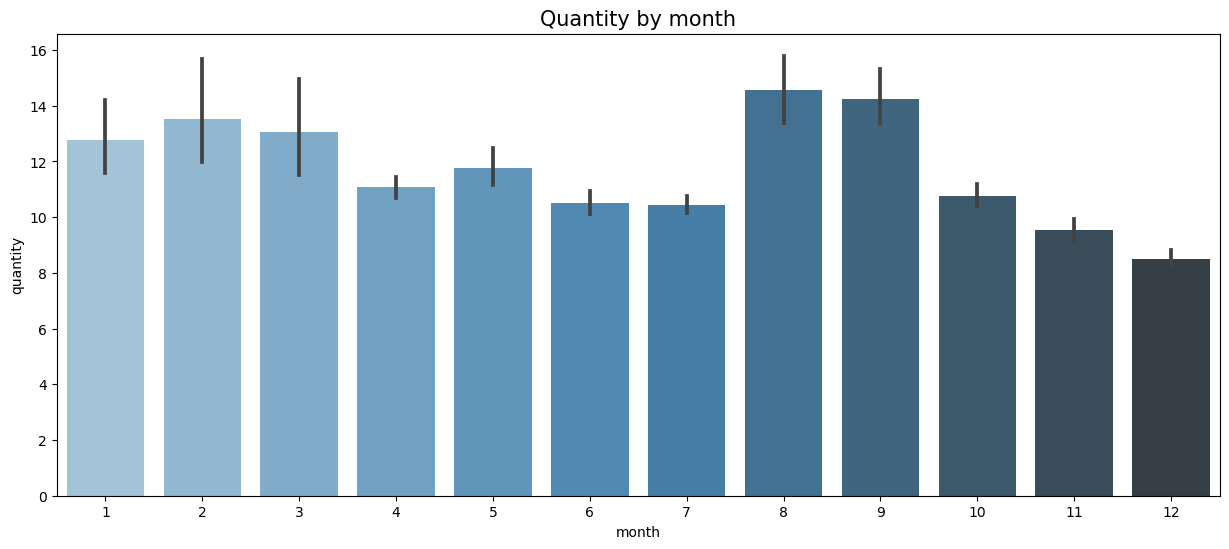

In [12]:
# 使用 Seaborn 绘制每月销售量的柱状图。 从图中可以看出整体销量呈一定周期性,Q1,Q3销量较高

# 导入matplotlib绘图包
import matplotlib.pyplot as plt
# 导入seaborn绘图包
import seaborn as sns

# 设置画布大小位15*6
f, ax = plt.subplots(figsize=(15, 6))

# 设置x/y轴名称、柱状图颜色、标题
ax = sns.barplot(x = "month", y = "quantity", data = df_12m, palette = "Blues_d").set_title("Quantity by month", fontsize = 15)

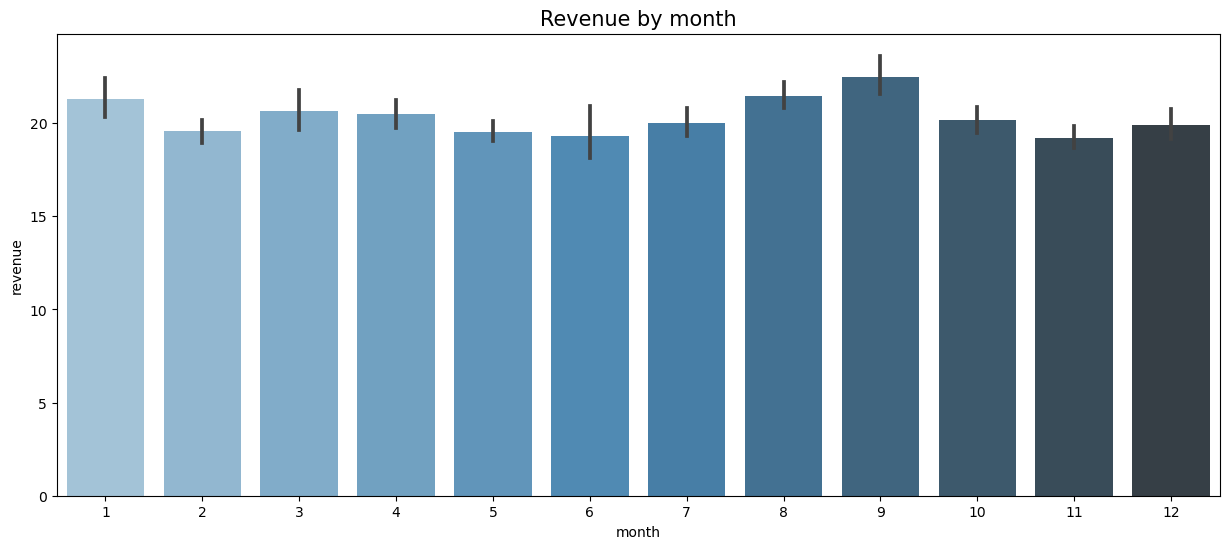

In [16]:
# 创建销售收入字段，查看订单价值在一年中的变化情况。波动情况跟销量的波动基本相符

# 导入matplotlib绘图库
import matplotlib.pyplot as plt
# 导入seaborn绘图库
import seaborn as sns

# assign函数用于添加新的列或修改现有列
# 添加新列名称是revenue 取quantity和UnitPrice相乘结果
df_12m = df_12m.assign(revenue = df_12m['quantity'] * df_12m['UnitPrice'])

# 设置画布大小位15*6
plt.figure(figsize = (15, 6))

# 设置画布
ax = sns.barplot(x = "month", y = "revenue", data = df_12m, palette="Blues_d").set_title("Revenue by month", fontsize = 15)

In [20]:
# 先将数据按sku 和 month分组，计算不同sku每个月的总销量
sku_group_by_arr = ['sku', 'month']
df_12m_units = df_12m.groupby(sku_group_by_arr)['quantity'].sum().to_frame().reset_index()
df_12m_units.head()

,sku,month,quantity
0,10002,1,291
1,10002,2,257
2,10002,3,642
3,10002,4,1132
4,10002,5,1465


In [21]:
# 使用透视表将数据转置，月份作为列，销售额作为行数据
df_12m_units = df_12m_units.pivot(index = 'sku', columns = 'month', values = 'quantity').add_prefix('m').reset_index().fillna(0)
df_12m_units.head()

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0


In [22]:
# XYZ模型需要计算标准差，标准差的大小代表了每月销量的波动情况

row_arr = ['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']
df_12m_units['std_demand'] = df_12m_units[row_arr].std(axis = 1)
df_12m_units.head()

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272


In [25]:
def total_demand(row_arr, df):
    '''
    对每行数据求和
    :param row_arr: 
    :param df: 
    :return: 
    '''
    row_total = 0;
    for row in row_arr:
        row_total += df[row]
    return row_total

In [24]:
# 计算每个sku的年需求量，实际就是每月数据求和sum()
row_arr = ['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']
df_12m_units = df_12m_units.assign(total_demand = total_demand(row_arr, df_12m_units))
df_12m_units.head()

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0


In [29]:
# 计算每月的平均需求
# 计算完总需求之后,我们接下来计算每个SKU的平均需求

df_12m_units = df_12m_units.assign(avg_demand = df_12m_units['total_demand'] / 12)
df_12m_units.head()

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0,667.583333
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0,0.666667
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0,32.333333
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0,73.416667
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0,82.583333


In [31]:
# 计算需求变异系数（Coefficient of Variation
# 计算全年每个 SKU 的需求变化量。 变化系数可以衡量销量的可预测性，变异系数接近零的值意味着变异最小且可预测性更高，而高值则相反。

df_12m_units['cov_demand'] = df_12m_units['std_demand'] / df_12m_units['avg_demand']
df_12m_units

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0,667.583333,0.591180
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0,0.666667,2.584921
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0,32.333333,0.902208
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0,73.416667,0.826314
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0,82.583333,0.534954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,gift_0001_30,2.0,0.0,1.0,3.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,0.0,1.073087,16.0,1.333333,0.804815
4107,gift_0001_40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.452267,3.0,0.250000,1.809068
4108,gift_0001_50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.389249,2.0,0.166667,2.335497
4109,gift_0001_70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102


In [32]:
# 数据按照变异系数高低排序，通过head() 和 tail() 查看需求变化最大和最小的产品
df_12m_units.sort_values(by = 'cov_demand', ascending = False).head(10)

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
813,21649,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.867513,100.0,8.333333,3.464102
2723,16169A,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.216878,25.0,2.083333,3.464102
117,20715,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.470054,400.0,33.333333,3.464102
929,21779,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.629909,68.0,5.666667,3.464102
3369,84706C,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.031833,59.0,4.916667,3.464102
3059,72739B,304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.757241,304.0,25.333333,3.464102
571,21343,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.020726,7.0,0.583333,3.464102
302,20994,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.020726,7.0,0.583333,3.464102
3745,85186B,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.041452,14.0,1.166667,3.464102
3061,72740A,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.752777,13.0,1.083333,3.464102


In [33]:
df_12m_units.sort_values(by = 'cov_demand', ascending = True).head(10)

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
4097,DOT,46.0,50.0,71.0,62.0,65.0,68.0,64.0,58.0,61.0,56.0,59.0,75.0,8.280591,735.0,61.250000,0.135193
465,21212,3924.0,4267.0,4643.0,5365.0,4336.0,4684.0,4493.0,4748.0,4668.0,6568.0,5851.0,5694.0,771.287133,59241.0,4936.750000,0.156234
725,21533,185.0,154.0,218.0,201.0,154.0,164.0,153.0,135.0,158.0,139.0,192.0,141.0,26.638432,1994.0,166.166667,0.160312
2478,84991,2997.0,3647.0,2878.0,3195.0,3541.0,3385.0,2270.0,3543.0,3043.0,3359.0,2312.0,2097.0,535.445800,36267.0,3022.250000,0.177168
1077,21977,2218.0,2439.0,2376.0,2822.0,2559.0,3223.0,1878.0,3513.0,2836.0,3213.0,3104.0,2288.0,492.174789,32469.0,2705.750000,0.181900
911,21755,299.0,288.0,346.0,244.0,195.0,290.0,246.0,334.0,325.0,366.0,364.0,225.0,56.237322,3522.0,293.500000,0.191609
1150,22080,228.0,250.0,277.0,185.0,191.0,214.0,187.0,169.0,220.0,247.0,297.0,162.0,42.653910,2627.0,218.916667,0.194841
3669,85123A,5486.0,2911.0,5076.0,3702.0,4435.0,4350.0,4028.0,4708.0,4394.0,4586.0,6542.0,5576.0,945.632977,55794.0,4649.500000,0.203384
123,20724,884.0,812.0,1165.0,1151.0,1137.0,1613.0,1299.0,1216.0,1499.0,1403.0,1508.0,1002.0,251.601943,14689.0,1224.083333,0.205543
463,21210,648.0,776.0,587.0,928.0,633.0,1041.0,1050.0,666.0,698.0,969.0,924.0,703.0,169.374495,9623.0,801.916667,0.211212


0.13519331703568235

In [36]:
print('最小值：', df_12m_units['cov_demand'].min())
print('平均值：', df_12m_units['cov_demand'].mean())
print('最大值：', df_12m_units['cov_demand'].max())

最小值： 0.13519331703568235
平均值： 1.545608726082916
最大值： 3.464101615137756


/tmp/ipykernel_3568/1316920669.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_12m_units['cov_demand']).set_title("Coefficient of Variation",fontsize=15)
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


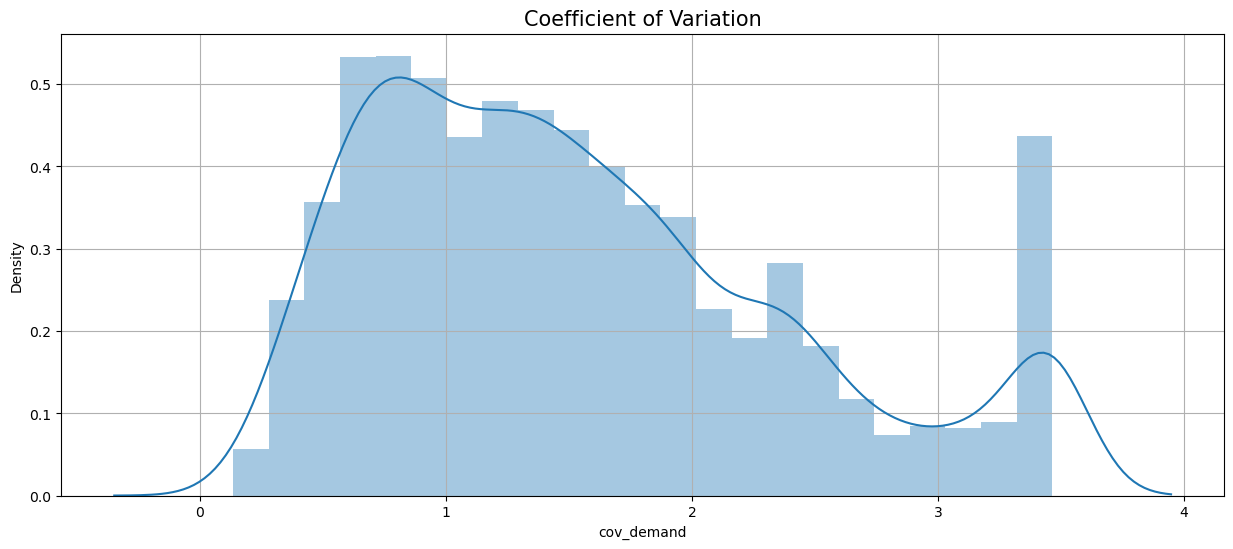

In [40]:

# 设置画布大小
f, ax = plt.subplots(figsize=(15, 6))
plt.grid(True)

# 绘制直方图，查看异变系数
ax = sns.distplot(df_12m_units['cov_demand']).set_title("Coefficient of Variation",fontsize=15)

In [42]:
def xyz_classify_product(cov):
    '''
    xyz模型分类
    :param cov: 
    :return: 
    '''
    if cov <= 0.5:
        return 'X'
    elif 0.5 < cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [49]:
df_12m_units['xyz_class'] = df_12m_units['cov_demand'].apply(xyz_classify_product)
df_12m_units.xyz_class.value_counts()

xyz_class
Z    2796
Y    1027
X     288
Name: count, dtype: int64

In [50]:
df_12m_units.head()

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0,667.583333,0.591180,Y
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0,0.666667,2.584921,Z
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0,32.333333,0.902208,Y
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0,73.416667,0.826314,Y
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0,82.583333,0.534954,Y


In [51]:
df_12m_units.groupby('xyz_class').agg(
    total_skus=('sku', 'nunique'),
    total_demand=('total_demand', 'sum'),
    std_demand=('std_demand', 'mean'),
    avg_demand=('avg_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

,total_skus,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
X,288,1457031.0,142.168315,421.594618,0.386288
Y,1027,2025709.0,115.210492,164.371065,0.759508
Z,2796,2281447.0,120.888684,67.997347,1.953767


In [54]:
# 创建一个名为 df_monthly 的新DataFrame，并将使用 groupby() 函数按产品的 xyz_class 对产品进行分组，然后按月汇总收入
df_monthly = df_12m_units.groupby('xyz_class').agg(
    m1=('m1', 'sum'),
    m2=('m2', 'sum'),
    m3=('m3', 'sum'),
    m4=('m4', 'sum'),
    m5=('m5', 'sum'),
    m6=('m6', 'sum'),
    m7=('m7', 'sum'),
    m8=('m8', 'sum'),
    m9=('m9', 'sum'),
    m10=('m10', 'sum'),
    m11=('m11', 'sum'),
    m12=('m12', 'sum'),
)

df_monthly.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
xyz_class,,,,,,,,,,,,
X,110525.0,107031.0,128742.0,121874.0,116987.0,129468.0,115204.0,121216.0,129124.0,130011.0,142829.0,104020.0
Y,104959.0,111910.0,164550.0,163979.0,163033.0,183679.0,147032.0,150508.0,181939.0,220160.0,255685.0,178275.0
Z,176041.0,163841.0,234109.0,82345.0,117186.0,95489.0,76684.0,201696.0,274294.0,271924.0,329935.0,257903.0


In [56]:
# 使用 unstack() 函数并重置索引并重命名列
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame()
df_monthly_unstacked = df_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
df_monthly_unstacked.head()

,month,xyz_class,demand
0,m1,X,110525.0
1,m1,Y,104959.0
2,m1,Z,176041.0
3,m2,X,107031.0
4,m2,Y,111910.0


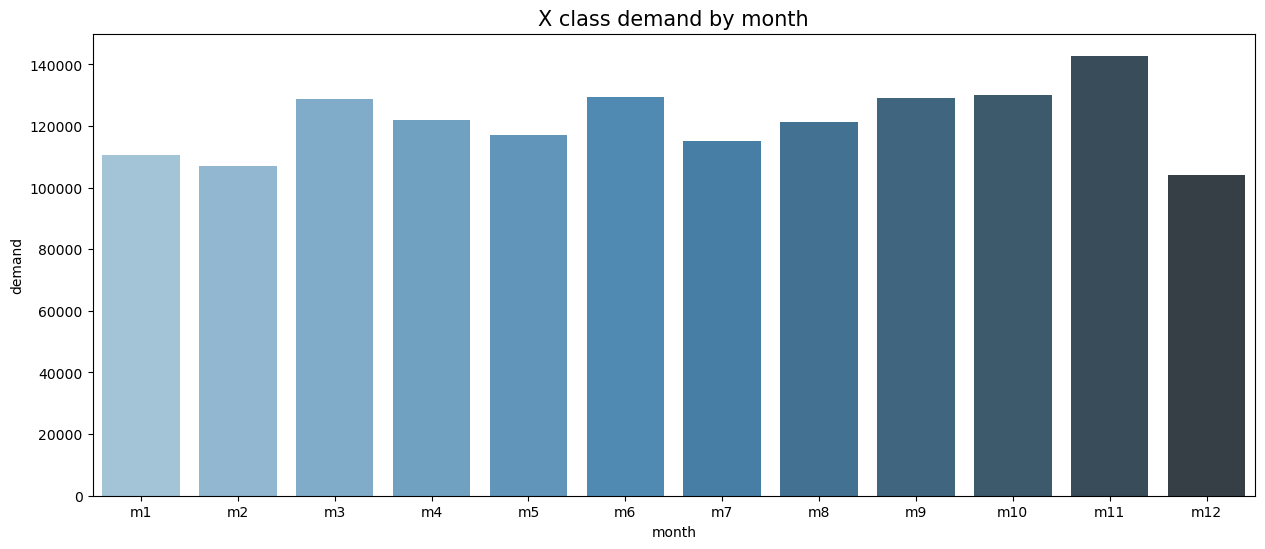

In [57]:
# XYZ数据可视化
f, ax = plt.subplots(figsize=(15, 6))
temp_data = df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='X']
ax = sns.barplot(x="month", y="demand", data= temp_data, palette="Blues_d").set_title("X class demand by month",fontsize = 15)

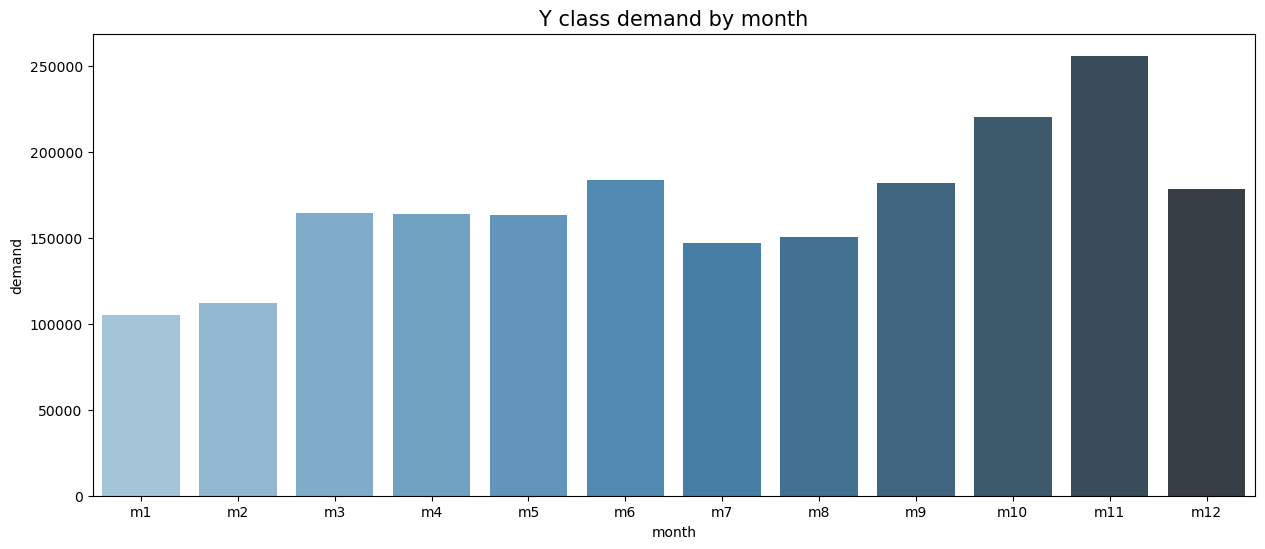

In [58]:
# Y 类商品的需求显示出较强的波动，10月11月的需求最多

f, ax = plt.subplots(figsize=(15, 6))
temp_y_data = df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Y']
ax = sns.barplot(x="month", y="demand", data= temp_y_data,palette="Blues_d").set_title("Y class demand by month",fontsize=15)

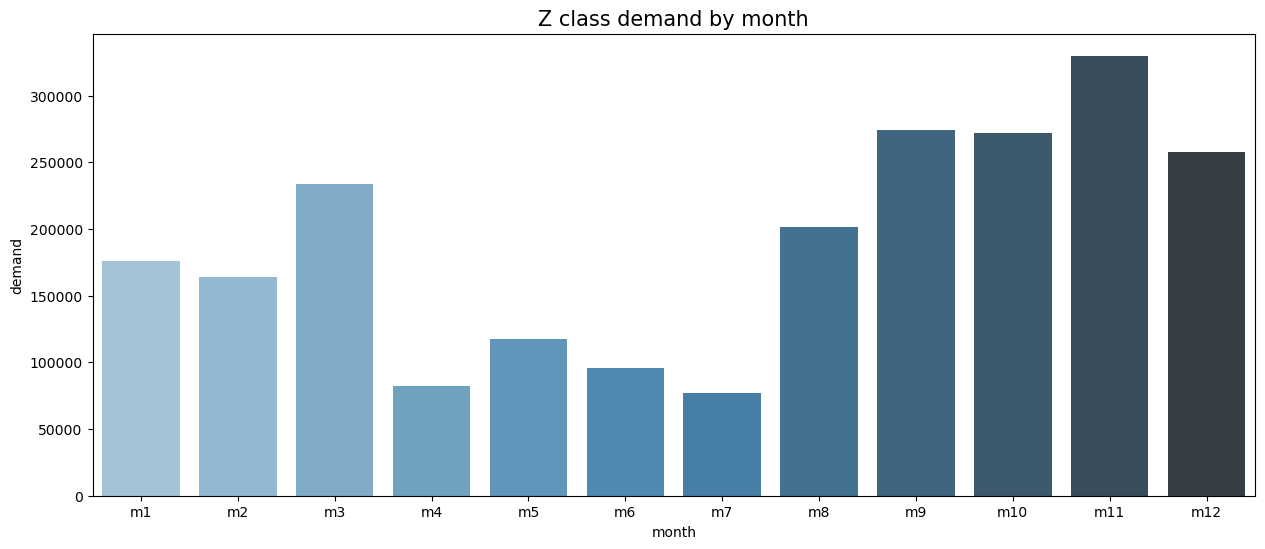

In [59]:
# Z 类 SKU 是最不可预测的，因为有些商品每年仅销售一次。
f, ax = plt.subplots(figsize=(15, 6))
temp_z_data = df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Z']
ax = sns.barplot(x="month", y="demand", data=temp_z_data, palette="Blues_d").set_title("Z class demand by month",fontsize=15)

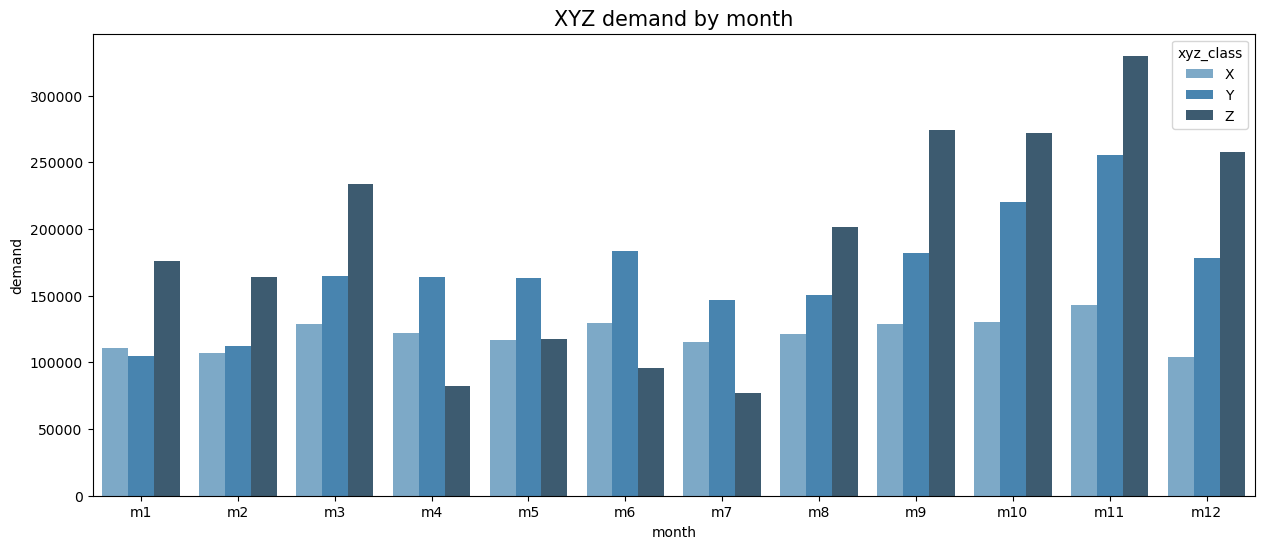

In [60]:
# XYZ类的数据绘制到一张图中，需求变化的对比会更加明显
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", y="demand", hue="xyz_class", data=df_monthly_unstacked,palette="Blues_d").set_title("XYZ demand by month",fontsize=15)

In [62]:
# 计算 ABC 类别，我们需要知道所有 SKU 产生的总收入以及每个 SKU 产生的累积收入贡献百分比
df_skus = df_12m.groupby('sku').agg(
    unique_purchases=('sku', 'nunique'),
    total_units=('quantity', 'sum'),
    total_revenue=('revenue', 'sum'),
).sort_values(by='total_revenue', ascending=False).reset_index()
df_skus.head()

,sku,unique_purchases,total_units,total_revenue
0,M,1,3004,263219.90
1,22423,1,15791,197948.47
2,85123A,1,55794,151668.63
3,DOT,1,735,122505.32
4,85099B,1,48255,86432.43


In [63]:
df_skus['revenue_cumsum'] = df_skus['total_revenue'].cumsum()
df_skus['revenue_total'] = df_skus['total_revenue'].sum()
df_skus['revenue_running_percentage'] = (df_skus['revenue_cumsum'] / df_skus['revenue_total']) * 100
df_skus.head()

,sku,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage
0,M,1,3004,263219.90,263219.90,1.030433e+07,2.554460
1,22423,1,15791,197948.47,461168.37,1.030433e+07,4.475483
2,85123A,1,55794,151668.63,612837.00,1.030433e+07,5.947376
3,DOT,1,735,122505.32,735342.32,1.030433e+07,7.136249
4,85099B,1,48255,86432.43,821774.75,1.030433e+07,7.975046


In [64]:
# 与 XYZ 分类一样，我们创建一个函数，根据每个产品对收入百分比的贡献将其打上对应类别标签
def abc_classify_product(p):
    if 0 < p <= 80:
        return 'A'
    elif 80 < p <= 90:
        return 'B'
    else:
        return 'C'

In [67]:
# 应用上面的 abc_classify_product() 函数为每个SKU打上ABC标签。 同时我们也计算一下产品销售排名，使用 rank() 函数

df_skus['abc_class'] = df_skus['revenue_running_percentage'].apply(abc_classify_product)
df_skus['abc_rank'] = df_skus['revenue_running_percentage'].rank().astype(int)
df_skus.head()

,sku,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class,abc_rank
0,M,1,3004,263219.90,263219.90,1.030433e+07,2.554460,A,1
1,22423,1,15791,197948.47,461168.37,1.030433e+07,4.475483,A,2
2,85123A,1,55794,151668.63,612837.00,1.030433e+07,5.947376,A,3
3,DOT,1,735,122505.32,735342.32,1.030433e+07,7.136249,A,4
4,85099B,1,48255,86432.43,821774.75,1.030433e+07,7.975046,A,5


In [68]:
# 接下来检查ABC每个类的统计数据
df_abc = df_skus.groupby('abc_class').agg(
    total_skus=('sku', 'nunique'),
    total_units=('total_units', sum),
    total_revenue=('total_revenue', sum),
).reset_index()

df_abc

/tmp/ipykernel_3568/3443431831.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_abc = df_skus.groupby('abc_class').agg(


,abc_class,total_skus,total_units,total_revenue
0,A,856,3893074,8241671.610
1,B,542,835848,1031934.140
2,C,2713,1035265,1030720.224


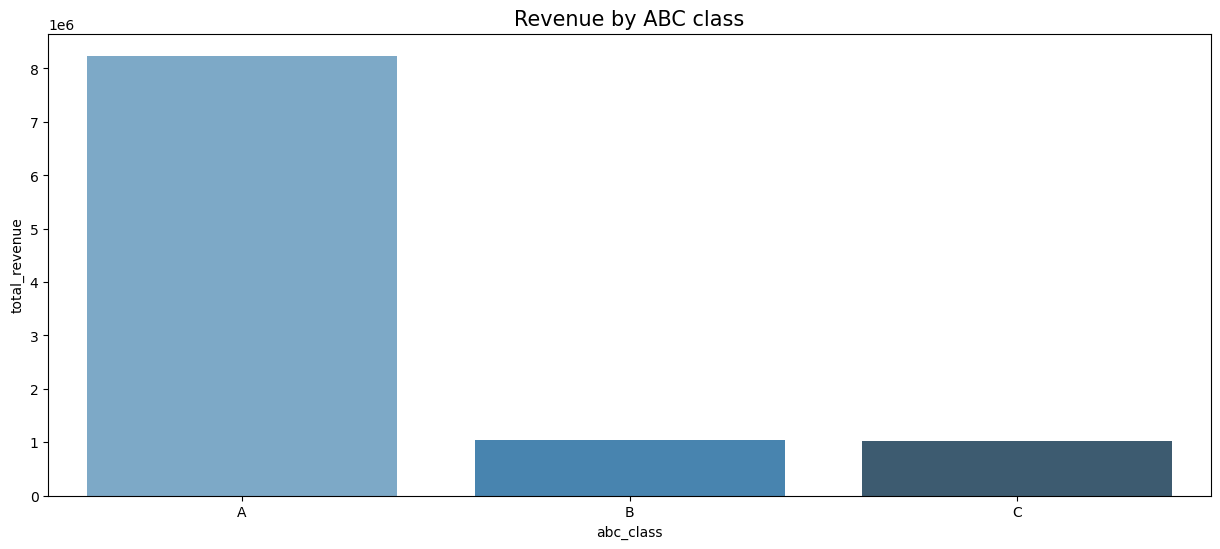

In [70]:
# 对ABC每个类别的销售收入进行可视化 ，可以看到我们使用的 80/10/10 分割
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", y="total_revenue", data=df_abc,palette="Blues_d").set_title("Revenue by ABC class",fontsize=15)

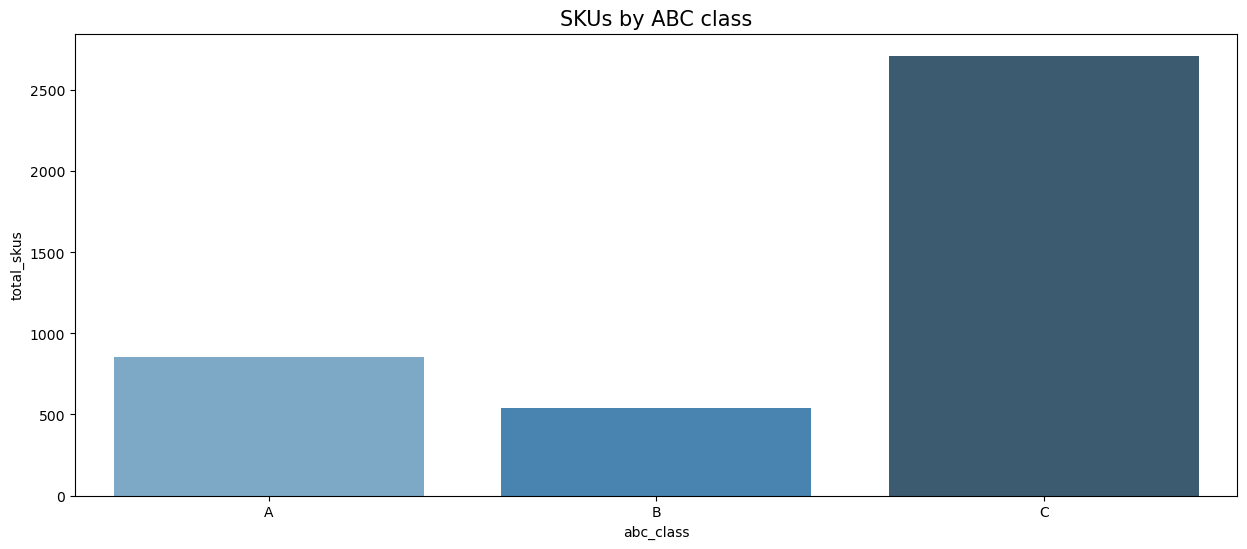

In [72]:
# C 类中存在大量 SKU，仅占公司总收入的 10%。
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", y="total_skus", data=df_abc, palette="Blues_d").set_title("SKUs by ABC class",fontsize=15)

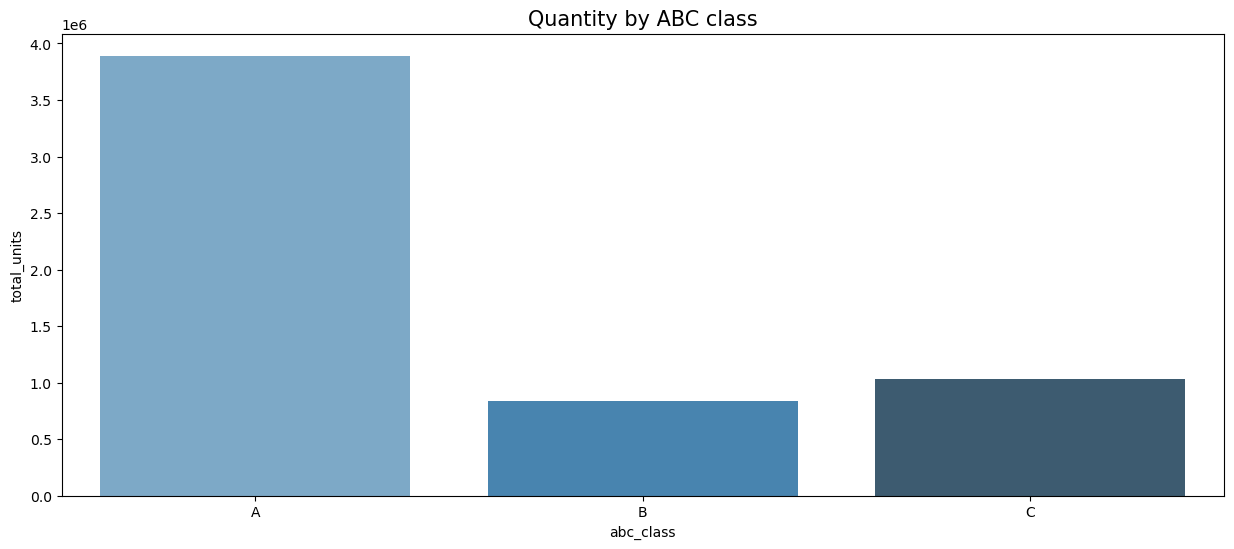

In [73]:
# 从销量来看，A类明显有很多，占收入的80%，但C类也有很多货，说明这里有很多便宜的季节性商品，或者 只是零星销售的东西。
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", y="total_units", data=df_abc, palette="Blues_d").set_title("Quantity by ABC class",fontsize=15)

In [74]:
# 最后一步是将 XYZ 和 ABC 标签数据结合起来
df_abc = df_skus[['sku','abc_class','abc_rank','total_revenue']]
df_xyz = df_12m_units.copy()
df_abc_xyz = df_abc.merge(df_xyz, on='sku', how='left')
df_abc_xyz.head()

,sku,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,M,A,1,263219.90,16.0,60.0,733.0,386.0,219.0,331.0,...,64.0,214.0,118.0,435.0,320.0,205.108988,3004.0,250.333333,0.819343,Y
1,22423,A,2,197948.47,0.0,0.0,751.0,1167.0,540.0,1356.0,...,1046.0,2061.0,1965.0,2210.0,3151.0,937.912814,15791.0,1315.916667,0.712745,Y
2,85123A,A,3,151668.63,5486.0,2911.0,5076.0,3702.0,4435.0,4350.0,...,4708.0,4394.0,4586.0,6542.0,5576.0,945.632977,55794.0,4649.500000,0.203384,X
3,DOT,A,4,122505.32,46.0,50.0,71.0,62.0,65.0,68.0,...,58.0,61.0,56.0,59.0,75.0,8.280591,735.0,61.250000,0.135193,X
4,85099B,A,5,86432.43,3572.0,2662.0,3259.0,3947.0,3616.0,4332.0,...,1861.0,7033.0,4376.0,6435.0,3569.0,1445.180085,48255.0,4021.250000,0.359386,X


In [75]:
# 创建ABC-XYZ分类
df_abc_xyz['abc_xyz_class'] = df_abc_xyz['abc_class'].astype(str) + df_abc_xyz['xyz_class'].astype(str)

In [77]:
df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(
    total_skus=('sku', 'nunique'),
    total_demand=('total_demand', sum),
    avg_demand=('avg_demand', 'mean'),
    total_revenue=('total_revenue', sum),
).reset_index()

df_abc_xyz_summary.sort_values(by='total_revenue', ascending=False)

/tmp/ipykernel_3568/3216476400.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(


,abc_xyz_class,total_skus,total_demand,avg_demand,total_revenue
1,AY,348,1528028.0,365.907088,3532677.560
2,AZ,317,1046135.0,275.009201,2365108.360
0,AX,191,1318911.0,575.441099,2343885.690
8,CZ,2164,762485.0,29.362485,708884.954
5,BZ,315,472827.0,125.086508,594016.900
4,BY,181,278019.0,128.001381,344828.710
7,CY,498,219662.0,36.757363,277108.440
3,BX,46,85002.0,153.989130,93088.530
6,CX,51,53118.0,86.794118,44726.830


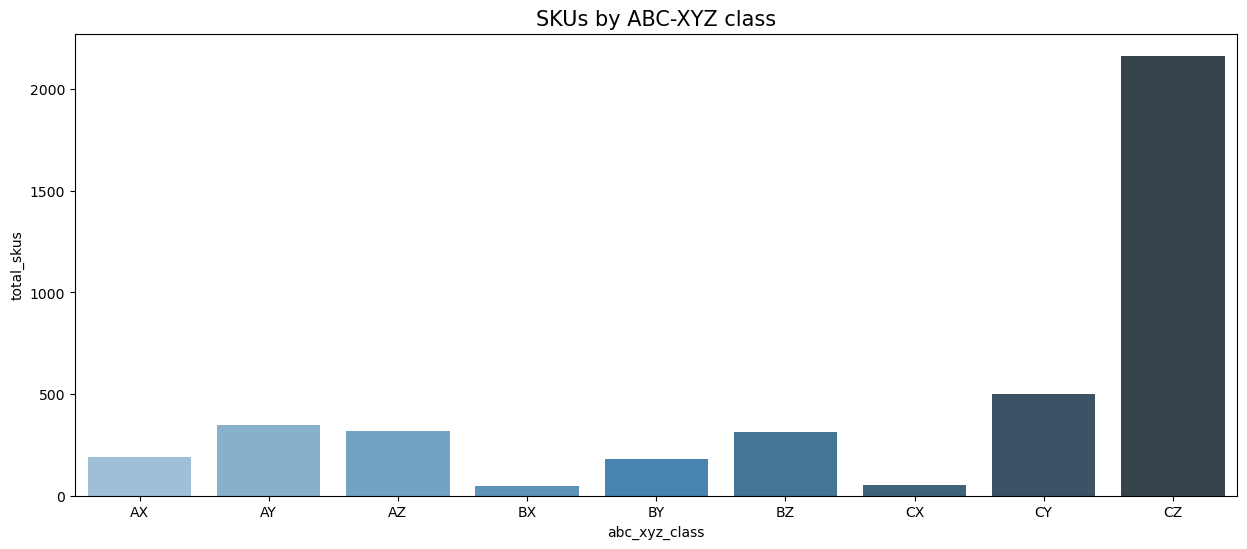

In [78]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", y="total_skus", data=df_abc_xyz_summary, palette="Blues_d").set_title("SKUs by ABC-XYZ class",fontsize=15)

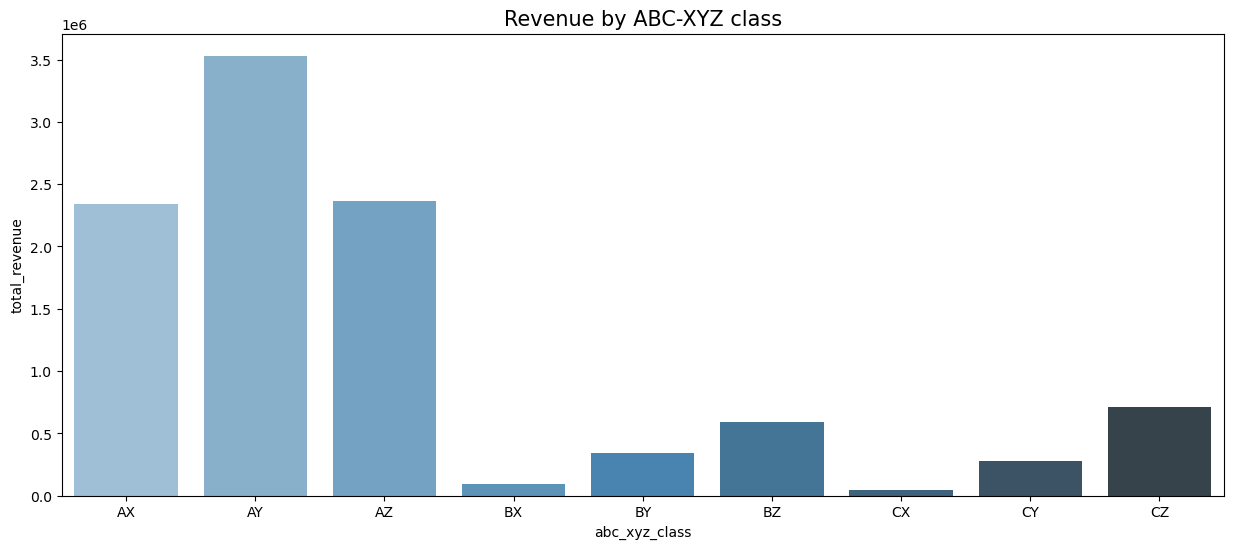

In [79]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class",
                 y="total_revenue",
                 data=df_abc_xyz_summary,
                 palette="Blues_d") \
    .set_title("Revenue by ABC-XYZ class",fontsize=15)

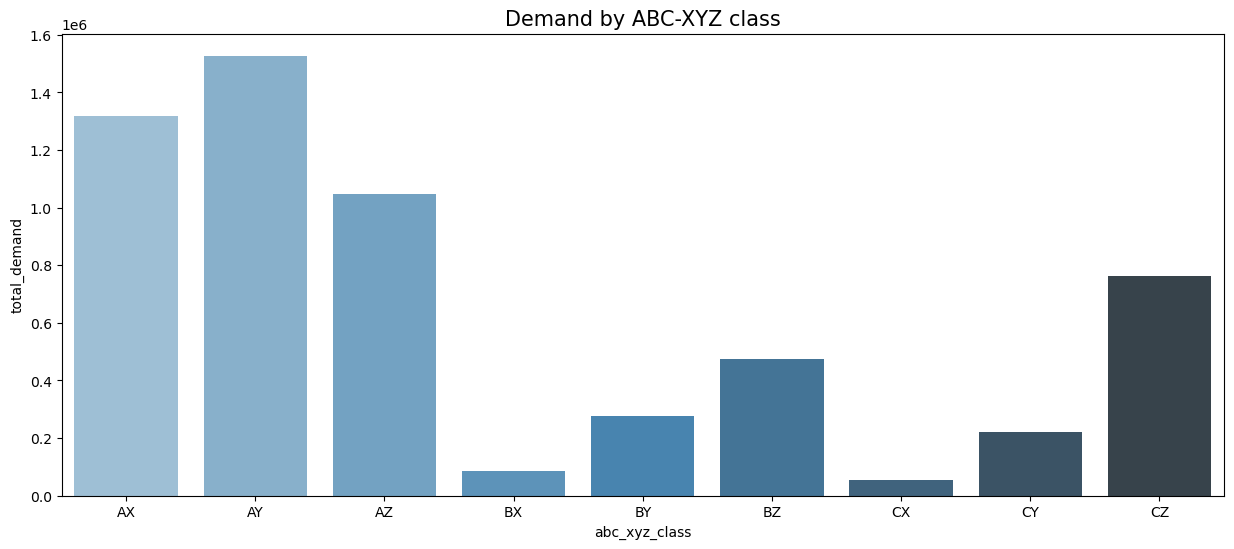

In [80]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class",
                 y="total_demand",
                 data=df_abc_xyz_summary,
                 palette="Blues_d") \
    .set_title("Demand by ABC-XYZ class",fontsize=15)